## Data loading

In [9]:
import sys
sys.path.append('../../_common/database_communicator/')

In [10]:
from db_connector import DBConnector
import pandas as pd

In [11]:
connector = DBConnector()
engine = connector.create_sql_engine()

In [12]:
df = pd.read_sql_query("SELECT * FROM data_staging", con=engine)

## Data cleaning

In [13]:
df['floor'].fillna('brak informacji', inplace=True)
df['status'].fillna('brak informacji', inplace=True)
df['property_type'].fillna('brak informacji', inplace=True)
df['rooms'].fillna(1, inplace=True)
df['year_built'].fillna('brak informacji', inplace=True)
df['property_condition'].fillna('brak informacji', inplace=True)

In [14]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

1432
0


### price column

In [15]:
df['price'] = df['price'].str.replace('zł', '').str \
    .replace(' ', '') \
    .replace(',', '.', regex=True) \
    .replace('Zapytajocenę', None, regex=True) \
    .astype(float)

In [16]:
df = df[df['price'].notna()]
df = df[df['price'] < 5000000.0]

### size column

In [17]:
df['size']= df['size'].str.replace(',', '.').astype(float)

### location column

In [18]:
import pandas as pd
import re

loc_list = ['Grunwald', 'Górczyn', 'Ławica', 'Łazarz', 'Junikowo', 'Jeżyce', 
            'Podolany', 'Sołacz', 'Wilda', 'Dębiec', 'Nowe Miasto', 'Łacina', 
            'Rataje', 'Starołęka Mała', 'Stare Miasto', 'Naramowice', 
            'Piątkowo', 'Winogrady', 'Chartowo']

# Function to find and return matching location from loc_list
def find_location(x):
    for loc in loc_list:
        if bool(re.search(loc, x)):
            return loc
    return 'Poznań'

# Apply the function on 'location' column
df['location'] = df['location'].apply(find_location)

In [19]:
df['location'].value_counts()

location
Grunwald        383
Stare Miasto    382
Nowe Miasto     282
Jeżyce          261
Wilda            89
Poznań           20
Piątkowo          7
Winogrady         6
Podolany          5
Naramowice        4
Rataje            4
Górczyn           2
Łazarz            2
Chartowo          1
Sołacz            1
Junikowo          1
Ławica            1
Name: count, dtype: int64

### floor column

In [20]:
df['floor'] = df['floor'].apply(lambda x: x.split('/')[0] if type(x) == str else x)

In [21]:
import pandas as pd

def extract_numbers(s):
    return ''.join(filter(str.isdigit, s)) if any(map(str.isdigit, s)) else s


df['floor'] = df['floor'].str.replace('parter', '0').str.replace('poddasze', '10').apply(extract_numbers)
df['floor'] = df['floor'].str.replace('zapytaj', 'brak informacji').str.replace('suterena', '-1')

In [22]:
df['floor'].unique()

array(['1', '5', '3', '2', '0', '4', '7', '10', 'brak informacji', '6',
       '-1', '8', '9'], dtype=object)

### status column

In [23]:
df['status'].unique()

array(['wtórny', 'pierwotny', 'brak informacji'], dtype=object)

### property_type column

In [24]:
df['property_type'] = df['property_type'].str.replace('plomba', 'pozostałe').str.replace('bliźniak', 'wolnostojący').str.replace('dom wolnostojący', 'wolnostojący')
df['property_type'].unique()

array(['brak informacji', 'blok', 'apartamentowiec', 'kamienica',
       'pozostałe', 'wolnostojący', 'szeregowiec'], dtype=object)

In [25]:
df['property_type'].value_counts()

property_type
brak informacji    614
blok               407
kamienica          199
apartamentowiec    140
szeregowiec         46
wolnostojący        32
pozostałe           13
Name: count, dtype: int64

### rooms column

In [26]:
df['rooms'].fillna(1, inplace=True)
df['rooms'].unique()

array(['2', '3', '1', '4', '6', '5', 1, '7', '8', '9', '10'], dtype=object)

### year_built column

In [27]:
df['year_built'].unique()

array(['brak informacji', '2023', '1900', '1930', '2003', '1960', '2017',
       '2024', '2012', '1970', '1980', '2009', '1905', '1950', '2020',
       '1962', '2008', '1906', '1912', '1983', '2013', '2010', '2001',
       '2018', '2005', '1902', '1972', '2019', '1990', '2014', '1891',
       '2016', '2015', '1968', '1910', '1996', '2007', '1965', '1985',
       '1923', '2006', '1945', '1955', '1986', '1924', '1963', '2022',
       '1880', '1928', '1978', '2021', '1997', '2011', '2025', '1920',
       '2000', '1999', '1901', '1927', '1929', '1975', '1992', '1969',
       '1908', '1942', '1959', '1961', '1949', '2004', '1911', '1989',
       '1987', '1933', '1976', '1979', '1967', '1964', '1903', '1904',
       '1875', '1938'], dtype=object)

### property_condition column

In [28]:
df['property_condition'] = df['property_condition'].str.replace('zapytaj', 'brak informacji')
df['property_condition'].unique()

array(['do zamieszkania', 'do wykończenia', 'brak informacji',
       'do remontu', 'stan surowy zamknięty'], dtype=object)

## Casting column types

In [29]:
numerical_col = ['size', 'rooms']
categorical_col = ['status', 'property_type', 'floor', 'year_built', 'property_condition', 'location']

for col in numerical_col:
    df[col] = df[col].astype(float)
    
for col in categorical_col:
    df[col] = df[col].astype('category')

In [30]:
df.head()

,url,price,status,size,property_type,rooms,floor,year_built,property_condition,location,desc,image_url
0,https://www.otodom.pl/pl/oferta/nowoczesne-dwu...,630000.0,wtórny,68.00,brak informacji,2.0,1,brak informacji,do zamieszkania,Nowe Miasto,Z przyjemnością przedstawiam ofertę sprzedaży ...,https://ireland.apollo.olxcdn.com/v1/files/eyJ...
1,https://www.otodom.pl/pl/oferta/nowe-3-pokoje-...,552520.0,pierwotny,51.00,blok,3.0,1,2023,do wykończenia,Nowe Miasto,Możliwość kontaktu telefonicznego w godzinach ...,https://ireland.apollo.olxcdn.com/v1/files/eyJ...
2,https://www.olx.pl/d/oferta/mieszkanie-3-pokoj...,649000.0,wtórny,59.00,blok,3.0,1,brak informacji,brak informacji,Naramowice,Zamieszkaj w dzielnicy Poznania blisko natury!...,https://ireland.apollo.olxcdn.com:443/v1/files...
3,https://www.otodom.pl/pl/oferta/wynajety-apart...,679000.0,pierwotny,41.92,apartamentowiec,2.0,5,2023,brak informacji,Nowe Miasto,Oferta bezpośrednio od właściciela – BRAK prow...,https://ireland.apollo.olxcdn.com/v1/files/eyJ...
4,https://www.otodom.pl/pl/oferta/atrakcyjne-mie...,679000.0,wtórny,43.65,kamienica,2.0,3,1900,do zamieszkania,Stare Miasto,* Stylowo urządzone * CHWALISZEWO *\n\nPrzedst...,https://ireland.apollo.olxcdn.com/v1/files/eyJ...


In [31]:
FEAT_COLS = ['status', 'size', 'property_type', 'rooms', 'floor', 'year_built', 'property_condition', 'location']
TARGET_COL = 'price'

X = df[FEAT_COLS]
y = df[TARGET_COL].astype(float)

In [32]:
X.head()

,status,size,property_type,rooms,floor,year_built,property_condition,location
0,wtórny,68.00,brak informacji,2.0,1,brak informacji,do zamieszkania,Nowe Miasto
1,pierwotny,51.00,blok,3.0,1,2023,do wykończenia,Nowe Miasto
2,wtórny,59.00,blok,3.0,1,brak informacji,brak informacji,Naramowice
3,pierwotny,41.92,apartamentowiec,2.0,5,2023,brak informacji,Nowe Miasto
4,wtórny,43.65,kamienica,2.0,3,1900,do zamieszkania,Stare Miasto


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [34]:
# X_val.to_csv('X_val.tsv', index=False, sep = '\t')
# y_val.to_csv('y_val.tsv', index=False, sep = '\t')
# X_test.to_csv('X_test.tsv', index=False, sep = '\t')
# y_test.to_csv('y_test.tsv', index=False, sep = '\t')
# X_train.to_csv('X_train.tsv', index=False, sep = '\t')
# y_train.to_csv('y_train.tsv', index=False, sep = '\t')

# Model

In [35]:
import numpy as np

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [64]:
regressor = XGBRegressor(enable_categorical=True)

In [65]:
## Hyper Parameter Optimization

param_grid = {
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3],
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [3, 5, 7, 9, 15, 25, 30],
    "min_child_weight": [1, 3, 5, 7, 10, 15, 20],
    "subsample": [0.5, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.5, 0.8, 0.9, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3, 0.5],
    "scale_pos_weight": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "eta": [0.01, 0.1, 0.2, 0.3, 0.5],
}

In [66]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=param_grid,
            cv=5, n_iter=150,
            scoring = 'neg_mean_absolute_error',n_jobs = 8,
            verbose = 2, 
            return_train_score = True,
            random_state=42)

In [67]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END colsample_bytree=1.0, eta=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=5, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.2, gamma=0.3, learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=50, scale_pos_weight=6, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, eta=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=5, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.2, gamma=0.3, learning_rate=0.01, max_depth=30, min_child_weight=7, n_estimators=50, scale_pos_weight=6, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, eta=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=100, scale_pos_weight=5, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.8, eta=0.2, gamma=0.3, learning_

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=True,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=N...
                                        'eta': [0.01, 0.1, 0.2, 0.3, 0.5],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.5],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7, 9, 15, 25, 30],
                                        'min_child_weight': [1, 3, 5, 7, 10, 15,
                                                             20],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500],
                                        'scale_pos_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'subsample': [0.5, 0.8, 0.9, 1.0]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [68]:
print(random_cv.best_params_)
print(random_cv.best_score_) 

random_cv.best_estimator_.feature_importances_

{'subsample': 0.8, 'scale_pos_weight': 2, 'n_estimators': 100, 'min_child_weight': 7, 'max_depth': 25, 'learning_rate': 0.1, 'gamma': 0, 'eta': 0.5, 'colsample_bytree': 0.8}
-106146.1625021552


array([0.08110934, 0.26996195, 0.06937139, 0.26804197, 0.06009605,
       0.06787933, 0.10368829, 0.07985173], dtype=float32)

In [69]:
eval_set = [(X_train, y_train), (X_test, y_test)]

regressor = XGBRegressor(**random_cv.best_params_, enable_categorical=True, objective='reg:linear')
regressor.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', early_stopping_rounds=10, verbose=False)

/home/armak/anaconda3/envs/pricepy/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/armak/anaconda3/envs/pricepy/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/armak/anaconda3/envs/pricepy/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:41:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=True, eta=0.5, eval_metric=None,
             feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=25,
             max_leaves=None, min_child_weight=7, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

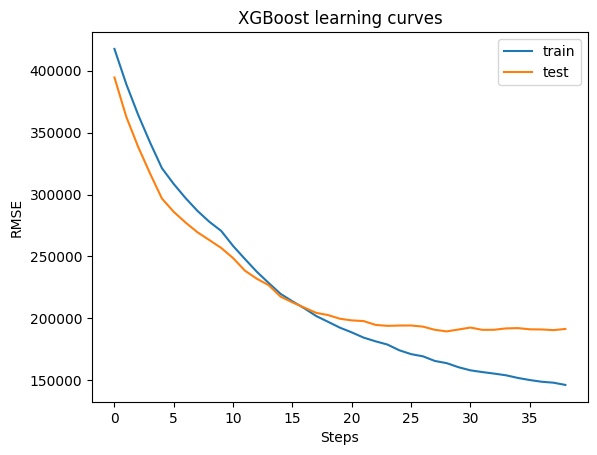

In [70]:
import matplotlib.pyplot as plt
results = regressor.evals_result()

# plot learning curves
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
plt.xlabel("Steps")
plt.ylabel("RMSE")
plt.title("XGBoost learning curves")
plt.legend()
plt.show()

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
preds = regressor.predict(X_test)

# Evaluate the model
mae_score = mean_absolute_error(y_test, preds)
print('MAE:', mae_score)

rmse_score = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE:', rmse_score)

r2 = r2_score(y_test, preds)
print('R2:', r2)

MAE: 103342.89870704467
RMSE: 189766.86631626682
R2: 0.8035422900401085
